In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df = pd.read_csv('credit_risk_dataset.csv')
#df = pd.read_csv('data.csv')
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,credit_risk_percent,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
credit_risk_percent           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [4]:
null_values = df.isnull()
print(null_values.sum())
df.dtypes

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
credit_risk_percent              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
credit_risk_percent           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)
null_values = df.isnull()
print(null_values.sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
credit_risk_percent           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df_missing = df[df[['person_emp_length', 'loan_int_rate']].isnull().any(axis=1)]
df_not_missing = df[~df[['person_emp_length', 'loan_int_rate']].isnull().any(axis=1)]
X_emp = df_not_missing[['loan_amnt', 'person_income', 'loan_status','cb_person_cred_hist_length']]
y_emp = df_not_missing['person_emp_length']

X_rate = df_not_missing[['person_income', 'loan_amnt', 'cb_person_cred_hist_length']]
y_rate = df_not_missing['loan_int_rate']


In [6]:
# create a linear regression model and fit it on the non-missing data
model_emp = LinearRegression()
model_emp.fit(X_emp, y_emp)

model_rate = LinearRegression()
model_rate.fit(X_rate, y_rate)

# use the trained models to predict the missing values
X_emp_missing = df_missing[['loan_amnt', 'person_income', 'loan_status','cb_person_cred_hist_length']]
y_emp_pred = model_emp.predict(X_emp_missing)

X_rate_missing = df_missing[['person_income', 'loan_amnt', 'cb_person_cred_hist_length']]
y_rate_pred = model_rate.predict(X_rate_missing)



# replace the missing values with the predicted values
df_missing.loc[df['person_emp_length'].isnull(), 'person_emp_length'] = (y_emp_pred[0:895])
df_missing.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = y_rate_pred[0:3116]


In [7]:
df = pd.concat([df_not_missing , df_missing] , axis=0).reset_index(drop=True)
df.isnull().sum()
#df_missing.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
credit_risk_percent           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
df.head()
print(df.person_home_ownership.value_counts())
print(df.loan_intent.value_counts())
print(df.loan_grade.value_counts())
print(df.cb_person_default_on_file.value_counts())

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


In [9]:
data = df
# Feature engineering
data['debt_to_income_ratio'] = data['loan_amnt'] / data['person_income']
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
data.head(20)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,credit_risk_percent,cb_person_cred_hist_length,debt_to_income_ratio,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0.593220,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0.104167,0,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0.572917,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.534351,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.643382,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0.252525,0,...,0,0,1,0,0,0,0,0,0,0
6,26,77100,8.0,35000,12.42,1,0.45,3,0.453956,0,...,0,0,0,1,0,0,0,0,0,0
7,24,78956,5.0,35000,11.11,1,0.44,4,0.443285,0,...,1,0,0,1,0,0,0,0,0,0
8,24,83000,8.0,35000,8.90,1,0.42,2,0.421687,0,...,0,1,0,0,0,0,0,0,0,0
9,21,10000,6.0,1600,14.74,1,0.16,3,0.160000,0,...,0,0,1,0,0,1,0,0,0,0


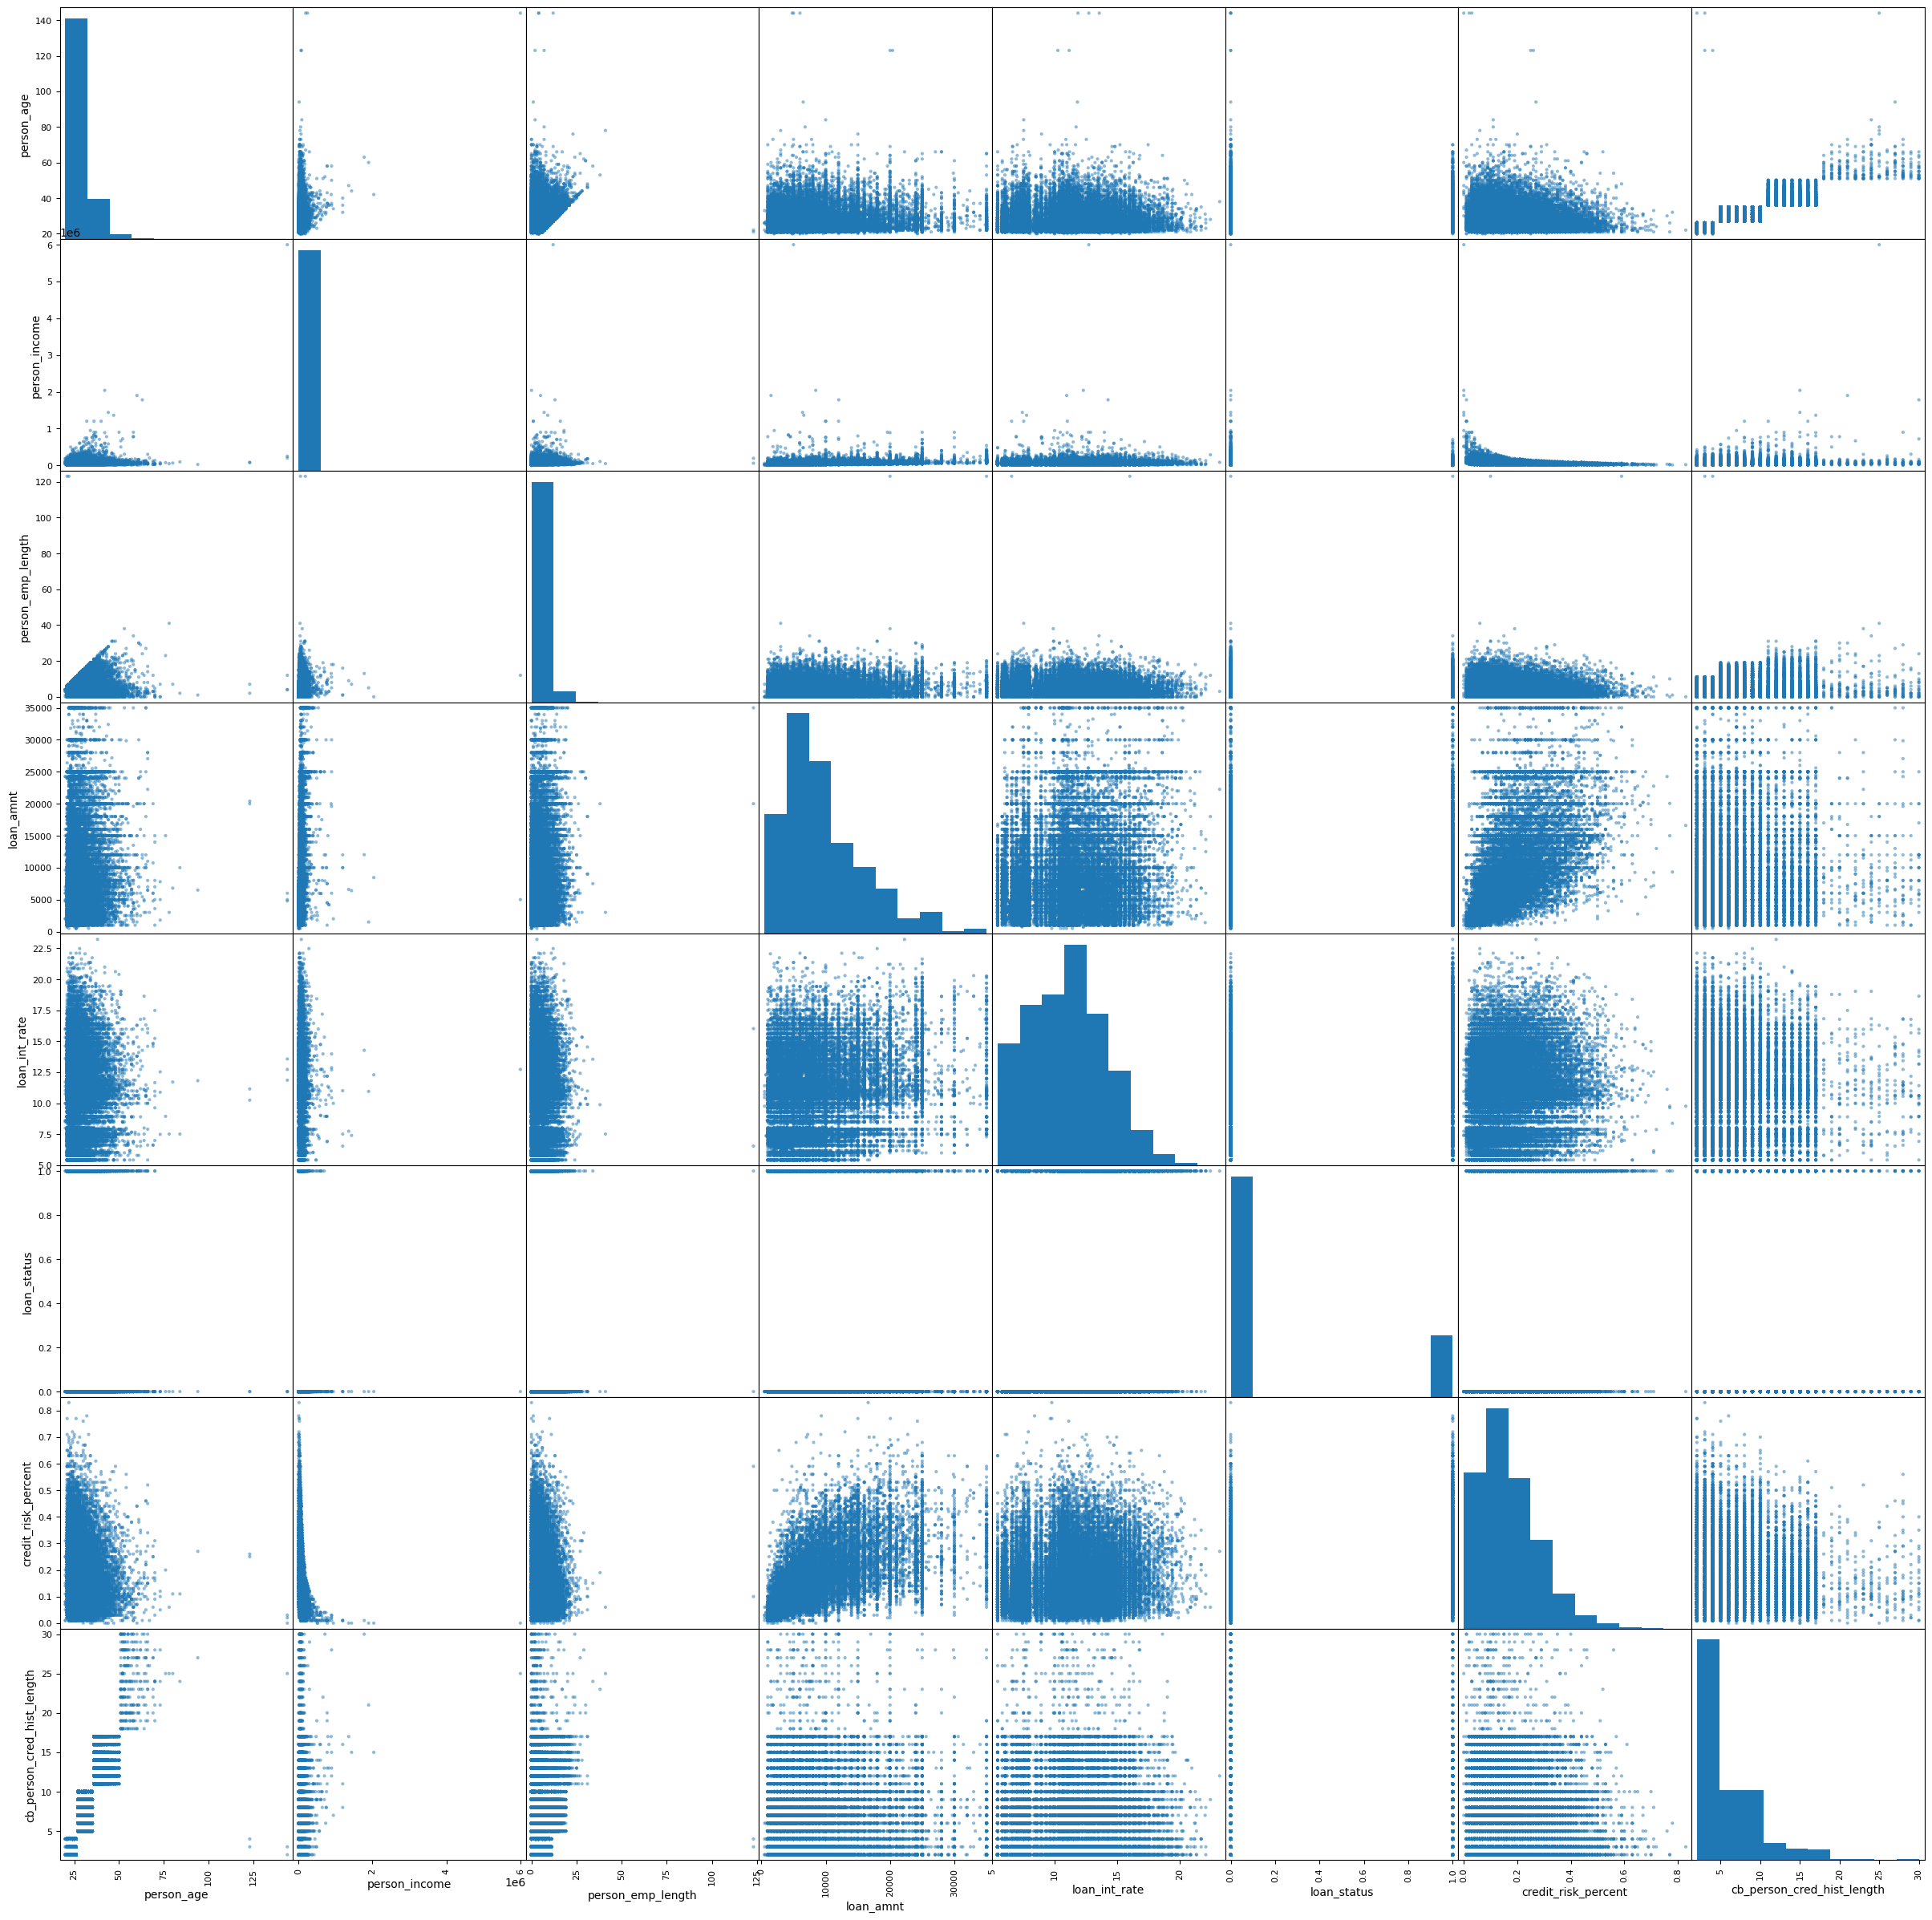

In [ ]:
import numpy as np

pd.plotting.scatter_matrix(df, figsize=(30, 30))
plt.show()

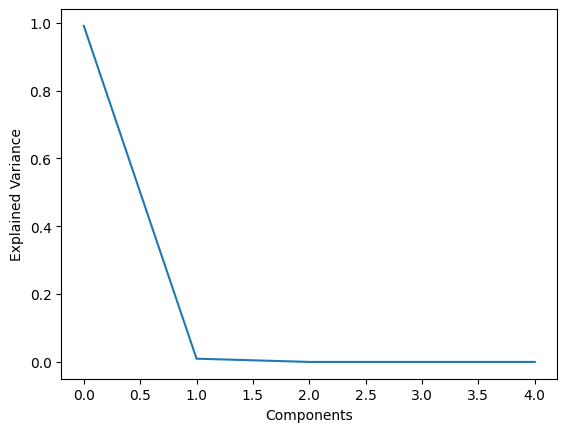

In [ ]:
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plt

pca = PCA(n_components=5)
pca.fit(data)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

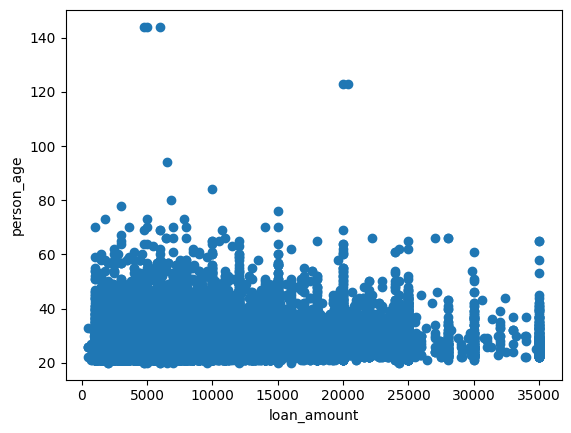

In [ ]:
plt.scatter(data['loan_amnt'], data['person_age'])
plt.xlabel('loan_amount')
plt.ylabel('person_age')
plt.show()

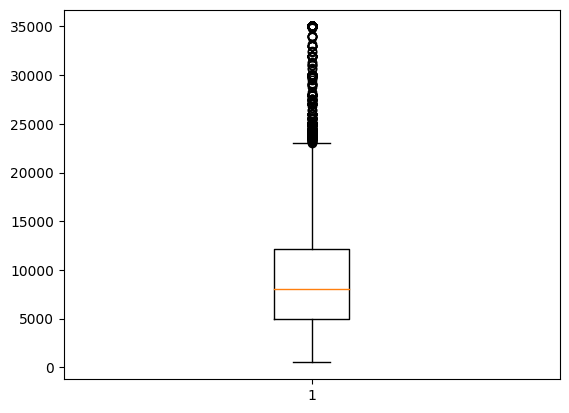

In [ ]:
plt.boxplot(data['loan_amnt'])

Q1 = data['loan_amnt'].quantile(0.05)
Q3 = data['loan_amnt'].quantile(0.95)
lean_data = data[((data['loan_amnt'] > (Q1)) & (data['loan_amnt'] < (Q3)))]

In [ ]:
data.shape

(32581, 24)

Assignment 3
:

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,credit_risk_percent,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Univariate Analysis

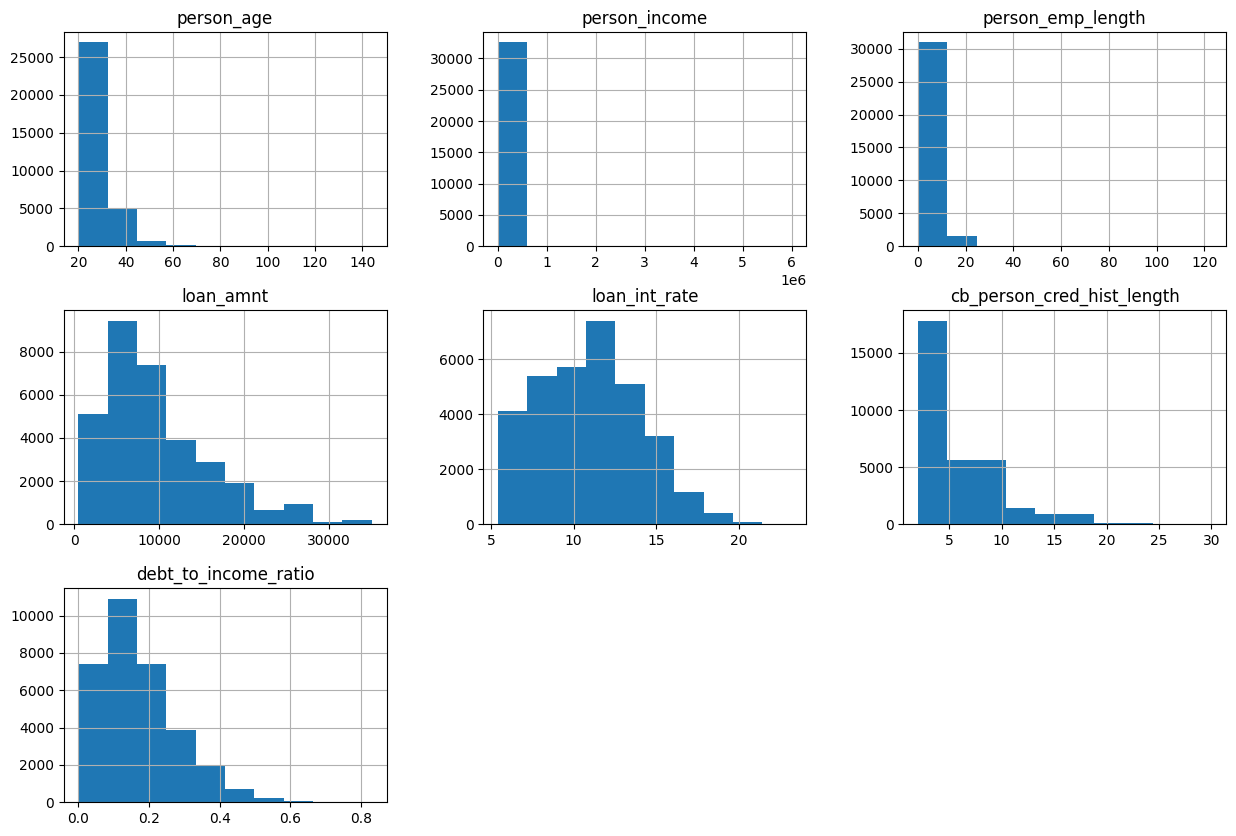

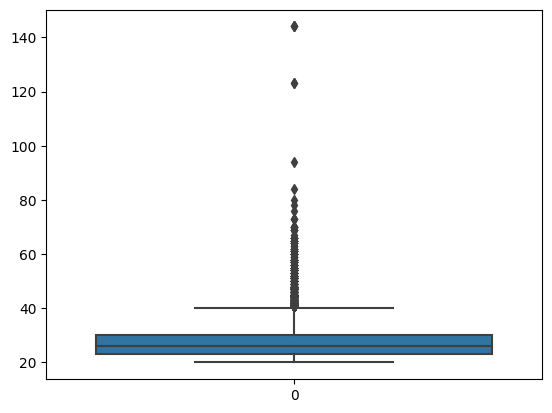

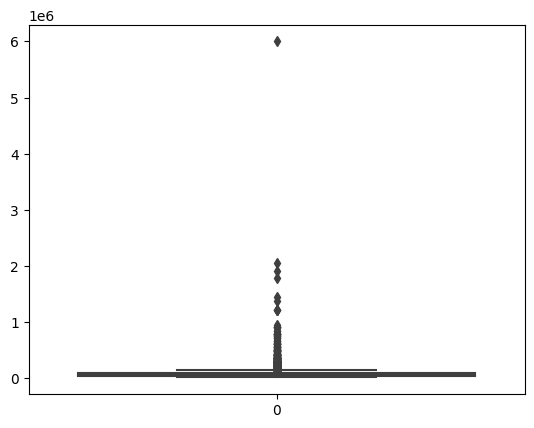

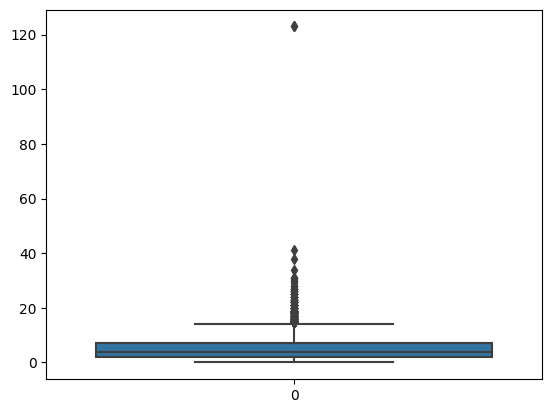

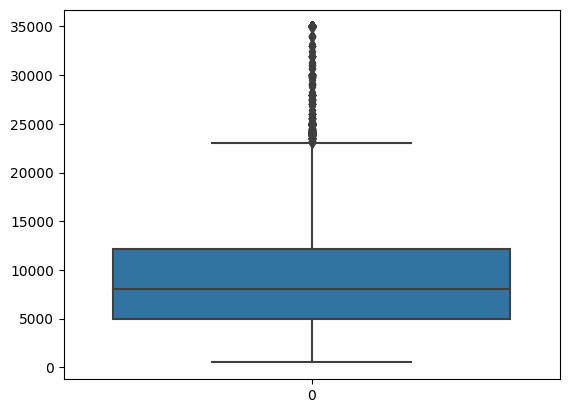

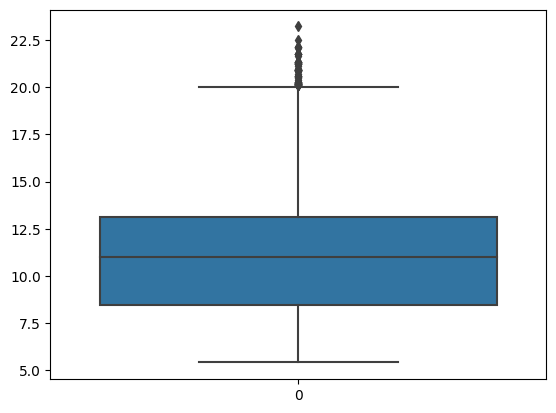

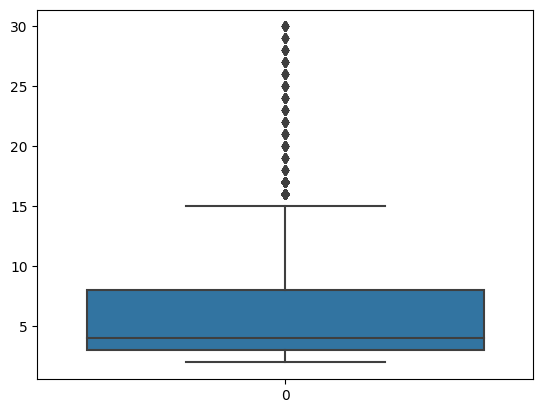

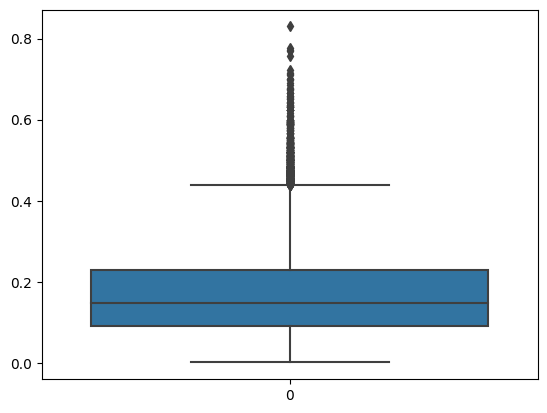

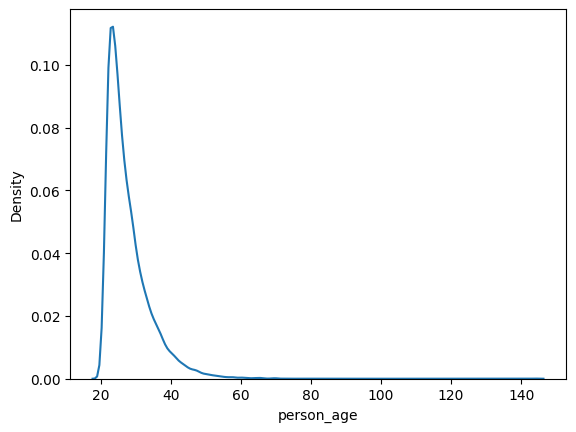

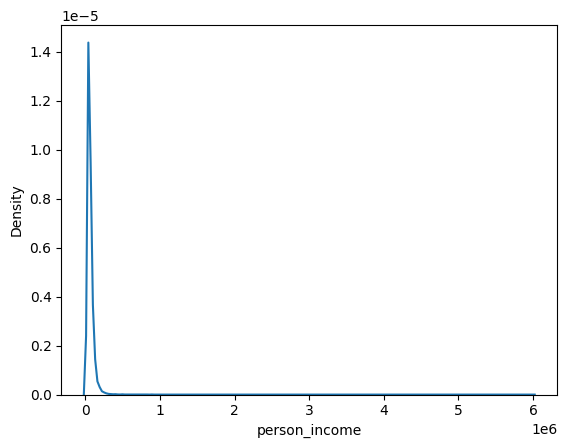

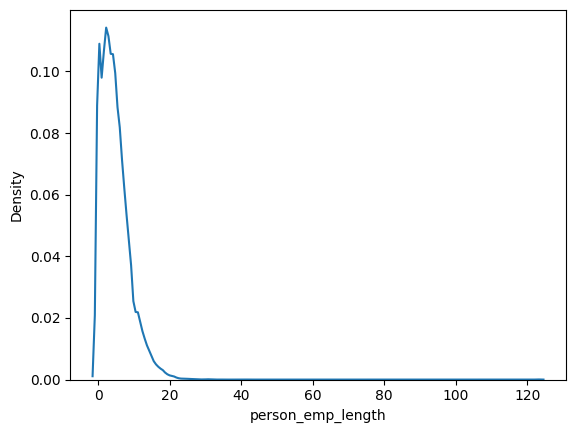

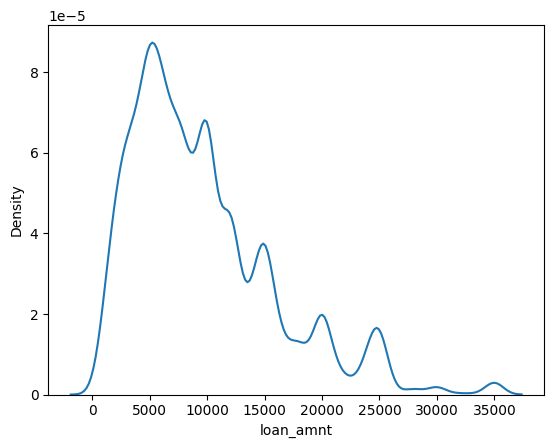

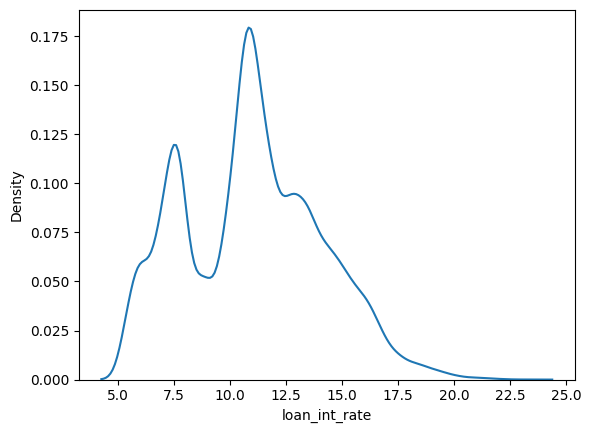

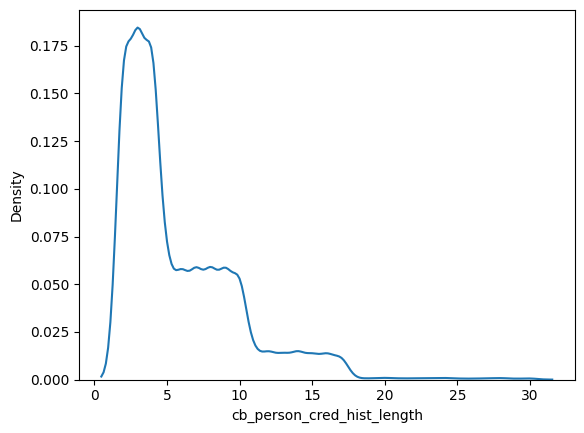

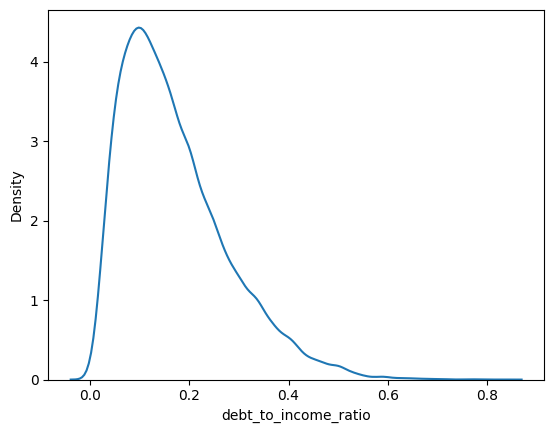

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Encode categorical variables using one-hot encoding
cat_vars = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df_encoded = pd.get_dummies(df, columns=cat_vars)

# Univariate Analysis of numerical variables
num_vars = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
            'cb_person_cred_hist_length', 'debt_to_income_ratio']

# Summary statistics of numerical variables
summary_stats = df[num_vars].describe()

# Histograms of numerical variables
df[num_vars].hist(bins=10, figsize=(15, 10))
plt.show()

# Boxplots of numerical variables
for var in num_vars:
    sns.boxplot(df[var])
    plt.show()

# Density plots of numerical variables
for var in num_vars:
    sns.kdeplot(df[var])
    plt.show()



Bivariate Analysis

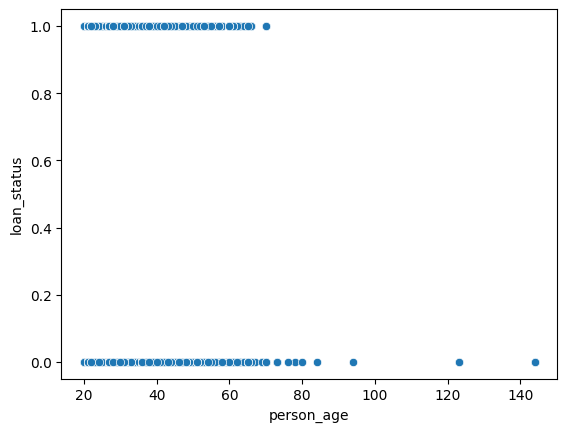

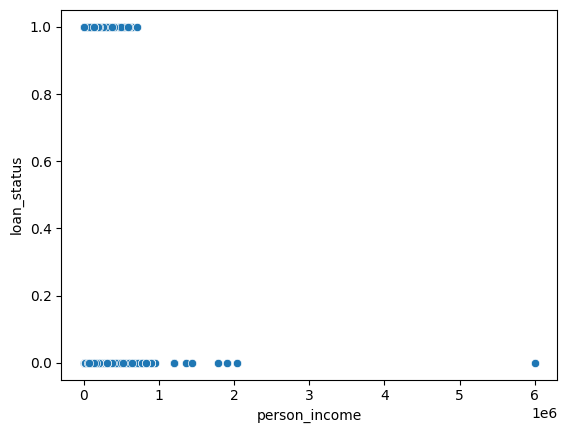

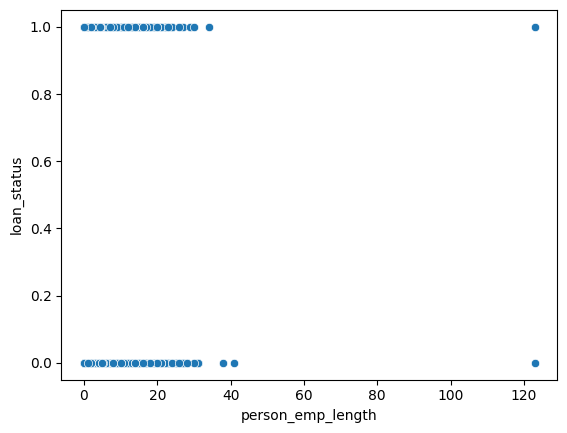

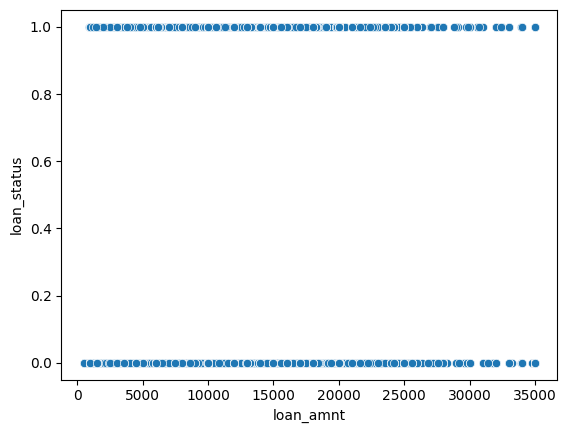

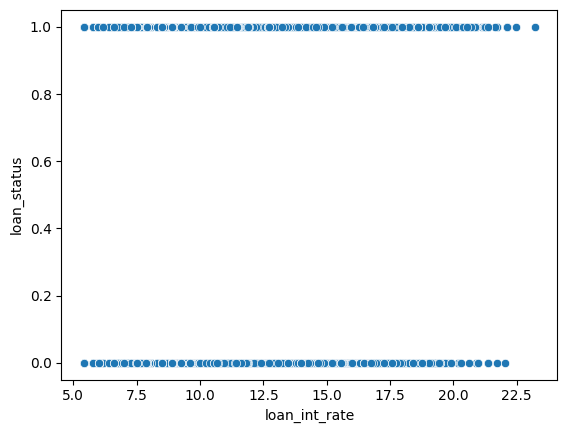

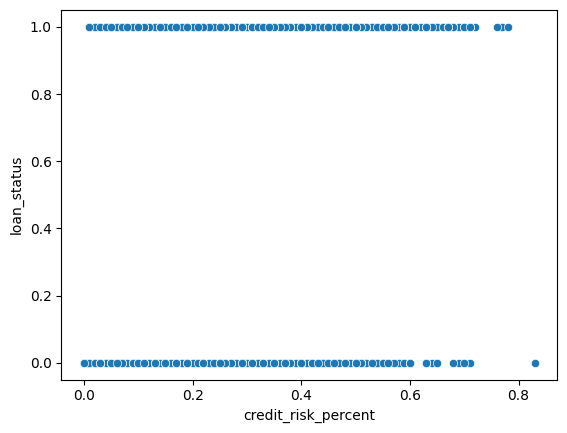

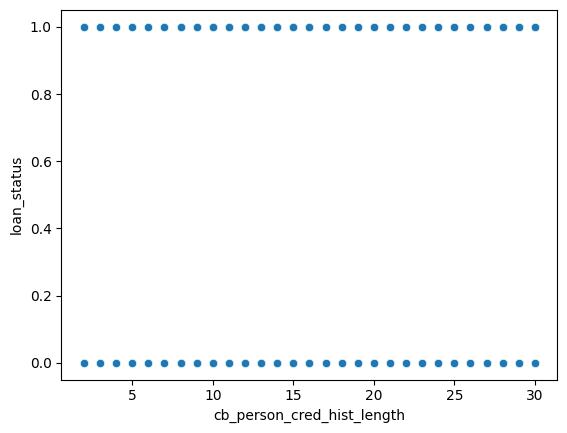

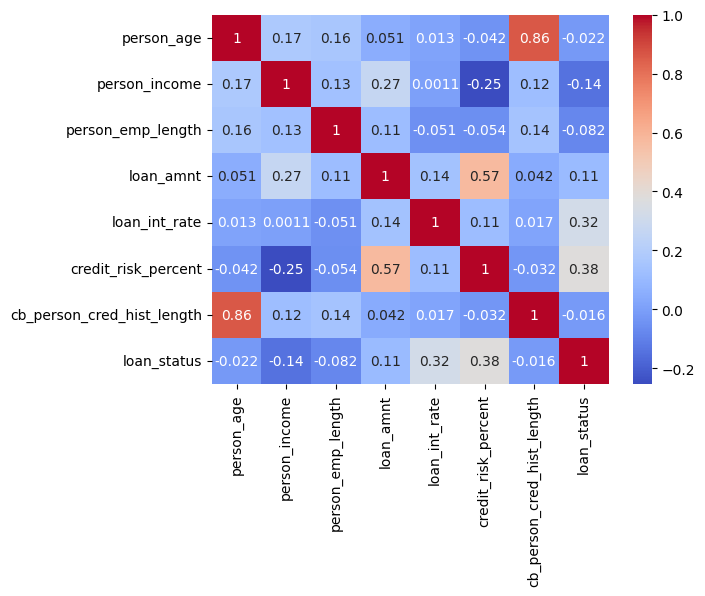

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of numerical variables against loan_status
num_vars = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'credit_risk_percent', 'cb_person_cred_hist_length', 'debt_to_income_ratio']
for var in num_vars:
    sns.scatterplot(data=df, x=var, y='loan_status')
    plt.show()

# Correlation matrix of numerical variables
num_vars.append('loan_status')
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


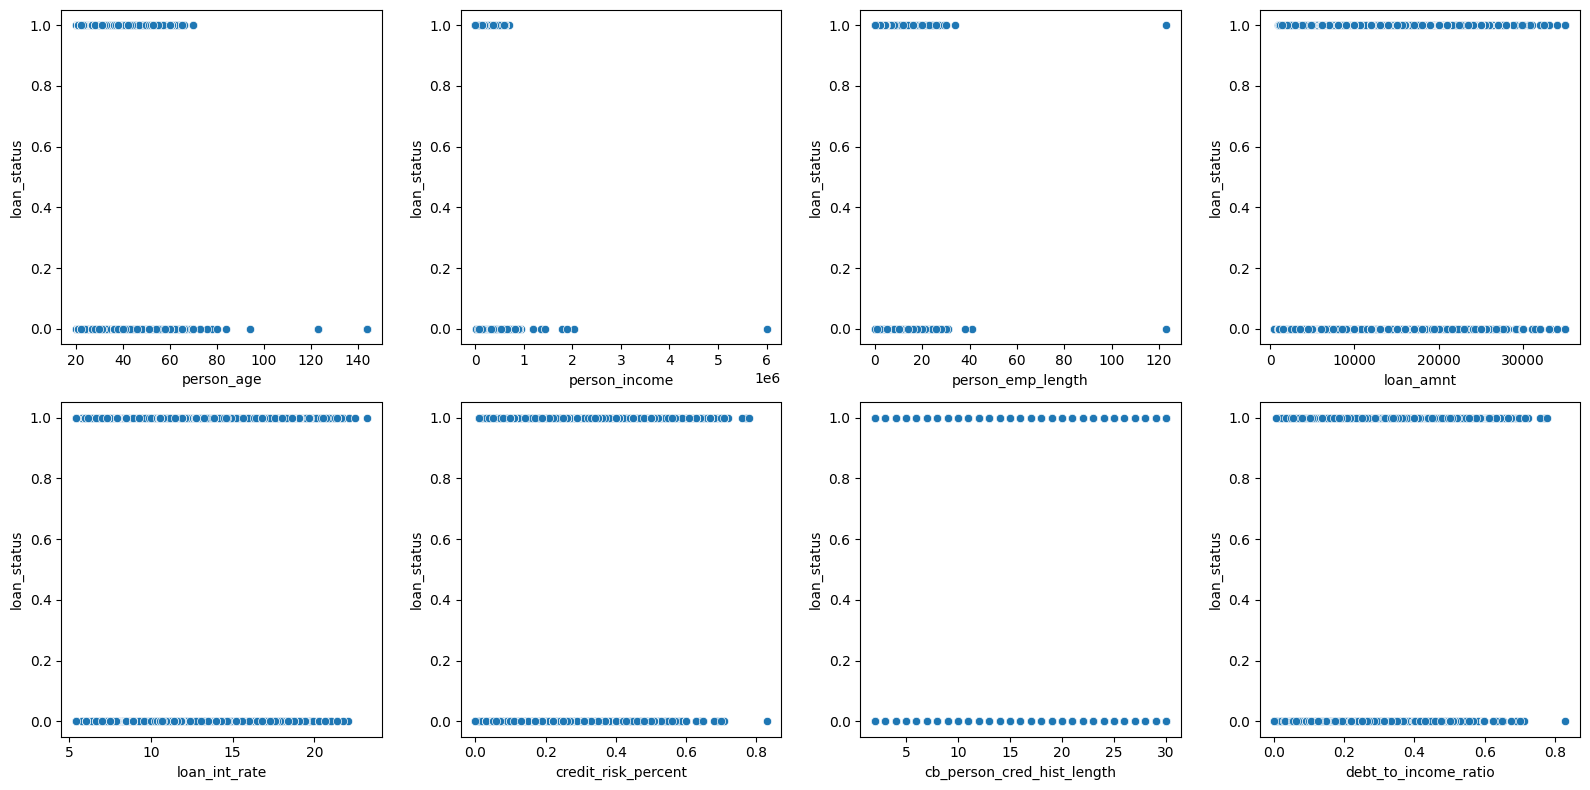

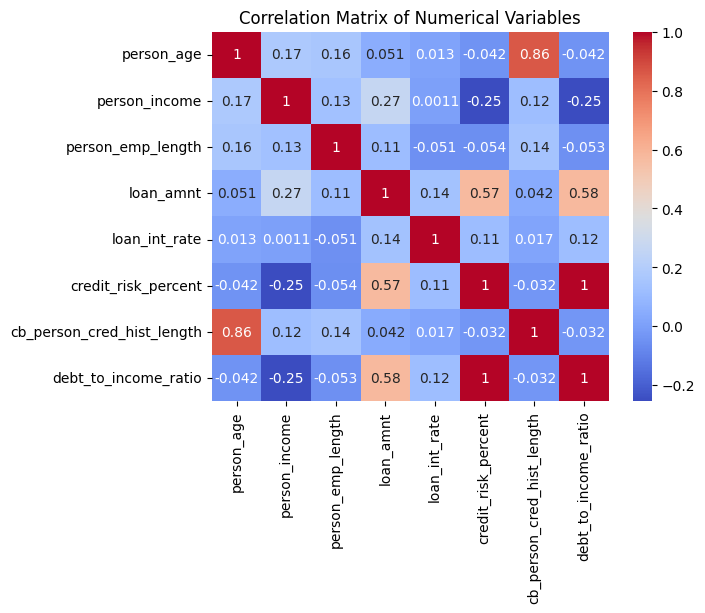

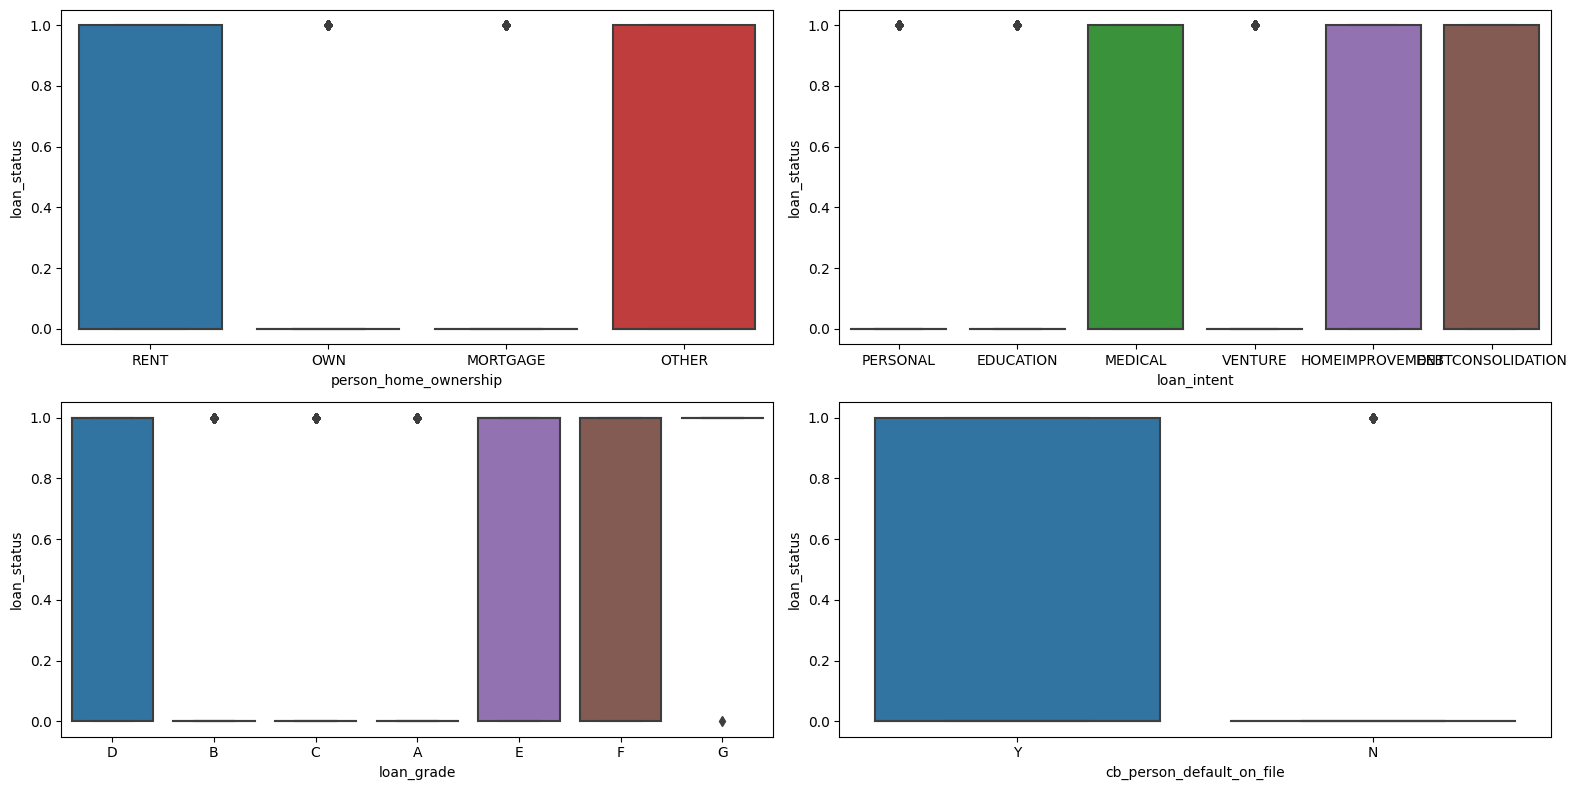

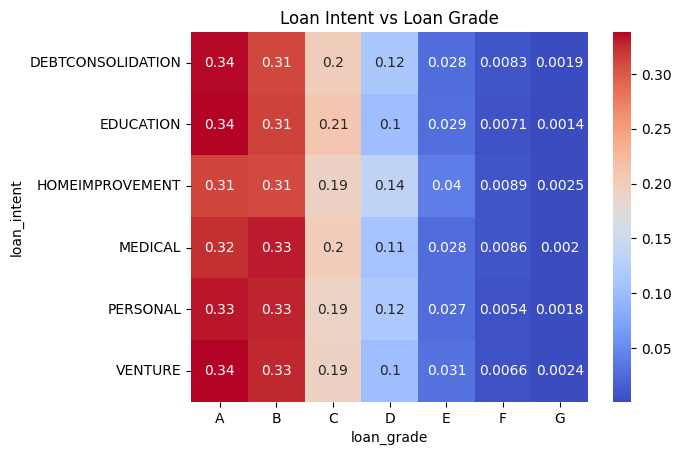

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Scatter plots of numerical variables against loan status
num_vars = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'credit_risk_percent', 'cb_person_cred_hist_length', 'debt_to_income_ratio']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for i, var in enumerate(num_vars):
    sns.scatterplot(data=df, x=var, y='loan_status', ax=axs[i//4][i%4])
plt.tight_layout()
plt.show()

# Correlation matrix of numerical variables
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Box plots of categorical variables against loan status
cat_vars = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
for i, var in enumerate(cat_vars):
    sns.boxplot(data=df, x=var, y='loan_status', ax=axs[i//2][i%2])
plt.tight_layout()
plt.show()

# Crosstab of loan intent and loan grade
ct = pd.crosstab(df['loan_intent'], df['loan_grade'], normalize='index')
sns.heatmap(ct, annot=True, cmap='coolwarm')
plt.title('Loan Intent vs Loan Grade')
plt.show()


Heat Map

<ipython-input-58-1e3e11ab8e20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


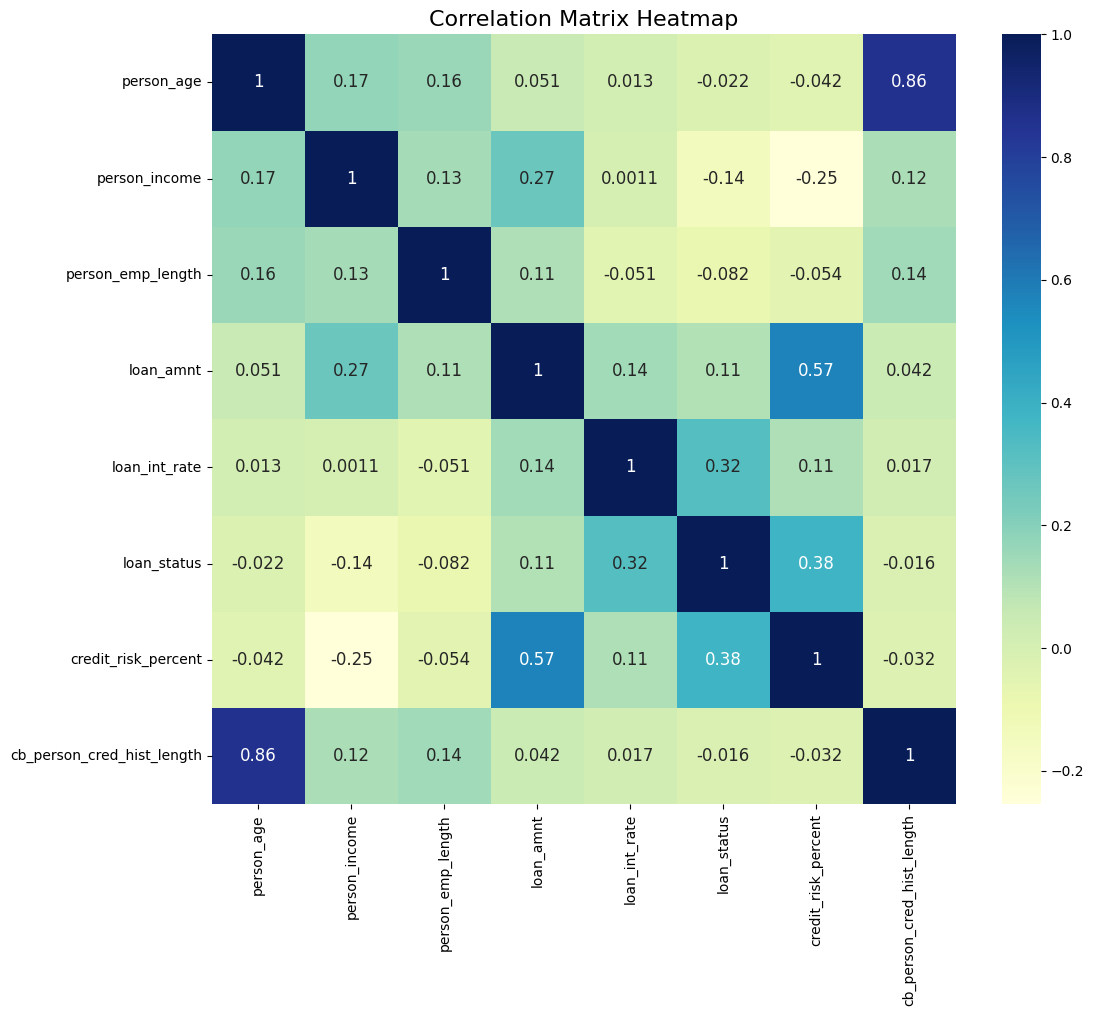

In [ ]:
# Calculate correlation matrix
corr = df.corr()

# Set figure size and font size
plt.figure(figsize=(12, 10))
annot_kws = {"fontsize": 12}

# Heat map of correlation matrix
sns.heatmap(corr, cmap="YlGnBu", annot=True, annot_kws=annot_kws)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()




Multivariate Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


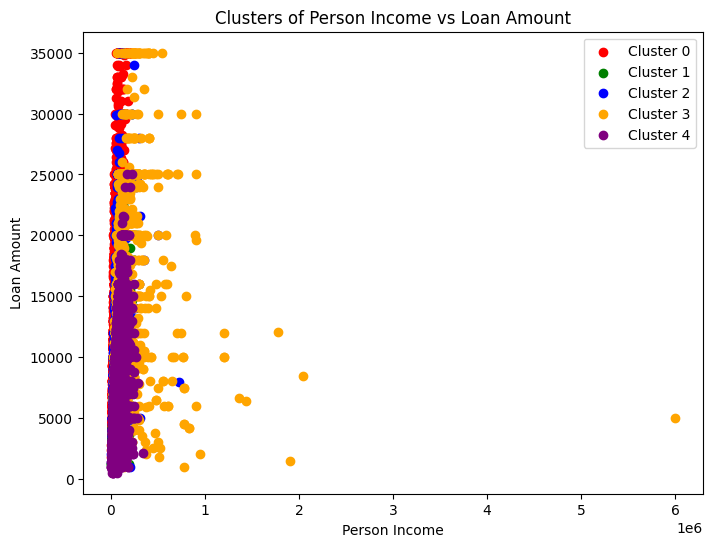

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Select relevant columns for clustering
X = df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'credit_risk_percent', 'cb_person_cred_hist_length', 'debt_to_income_ratio']]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
k = 5

# Train the KMeans model
model = KMeans(n_clusters=k)
model.fit(X_scaled)

# Add the cluster labels to the original dataset
df['cluster'] = model.labels_

# Visualize the clusters
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i in range(k):
    ax.scatter(df.loc[df['cluster'] == i, 'person_income'], df.loc[df['cluster'] == i, 'loan_amnt'], c=colors[i], label='Cluster %d' % i)
ax.legend()
ax.set_xlabel('Person Income')
ax.set_ylabel('Loan Amount')
plt.title('Clusters of Person Income vs Loan Amount')
plt.show()


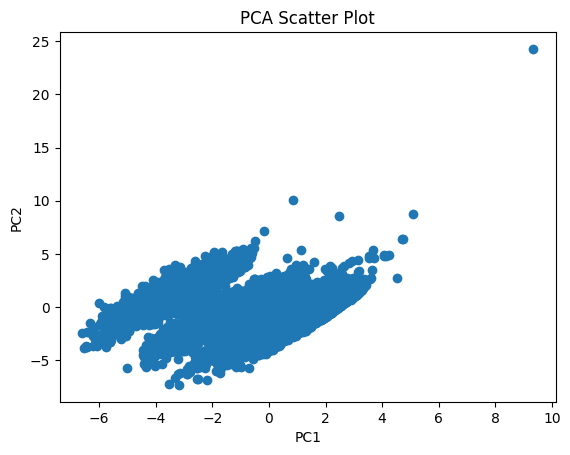

In [13]:
#applying PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Fit PCA model to the data
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Transform the data into the new principal component space
pca_data = pca.transform(scaled_data)

# Plot the first two principal components
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot")
plt.show()


Visualizations


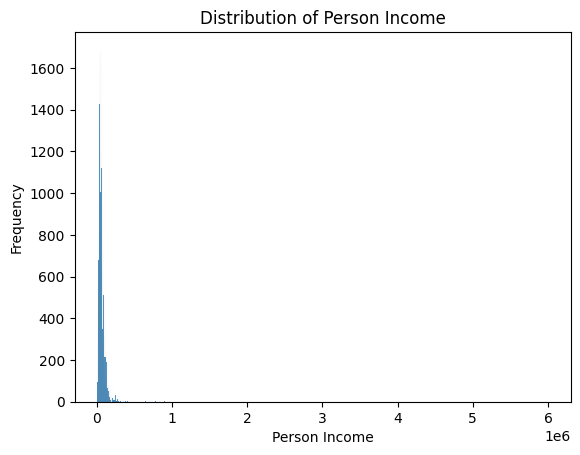

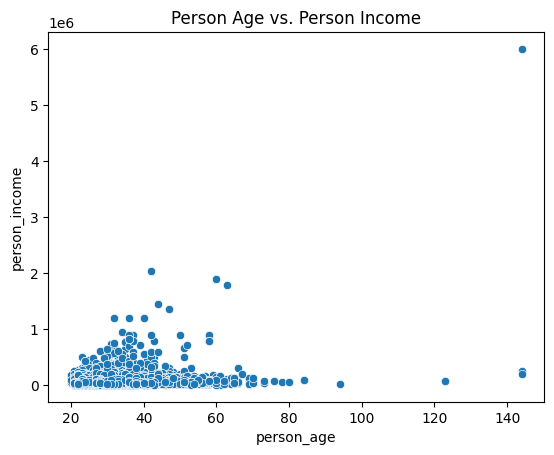

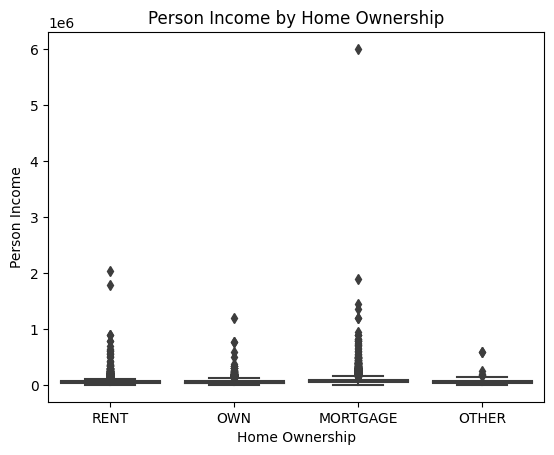

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["person_income"], kde=False)
plt.title("Distribution of Person Income")
plt.xlabel("Person Income")
plt.ylabel("Frequency")
plt.show()

sns.scatterplot(x="person_age", y="person_income", data=df)
plt.title("Person Age vs. Person Income")
plt.show()

sns.boxplot(x="person_home_ownership", y="person_income", data=df)
plt.title("Person Income by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Person Income")
plt.show()


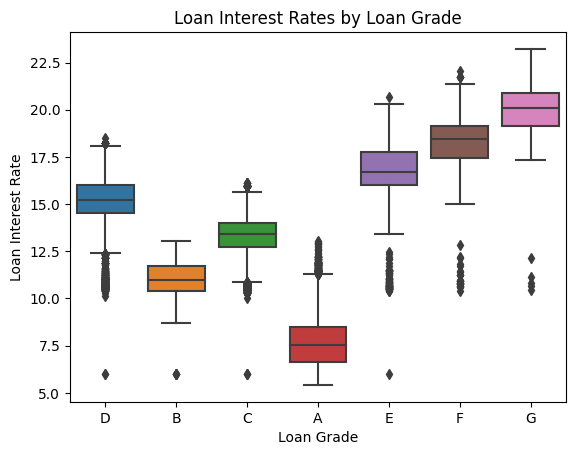

In [15]:
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df)
plt.title('Loan Interest Rates by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Interest Rate')
plt.show()


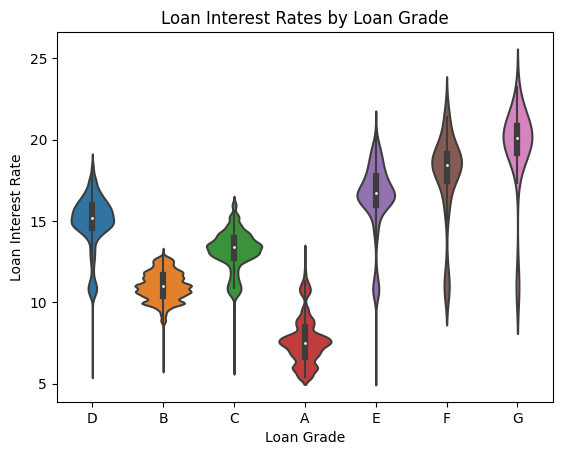

In [ ]:
sns.violinplot(x='loan_grade', y='loan_int_rate', data=df)
plt.title('Loan Interest Rates by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Interest Rate')
plt.show()


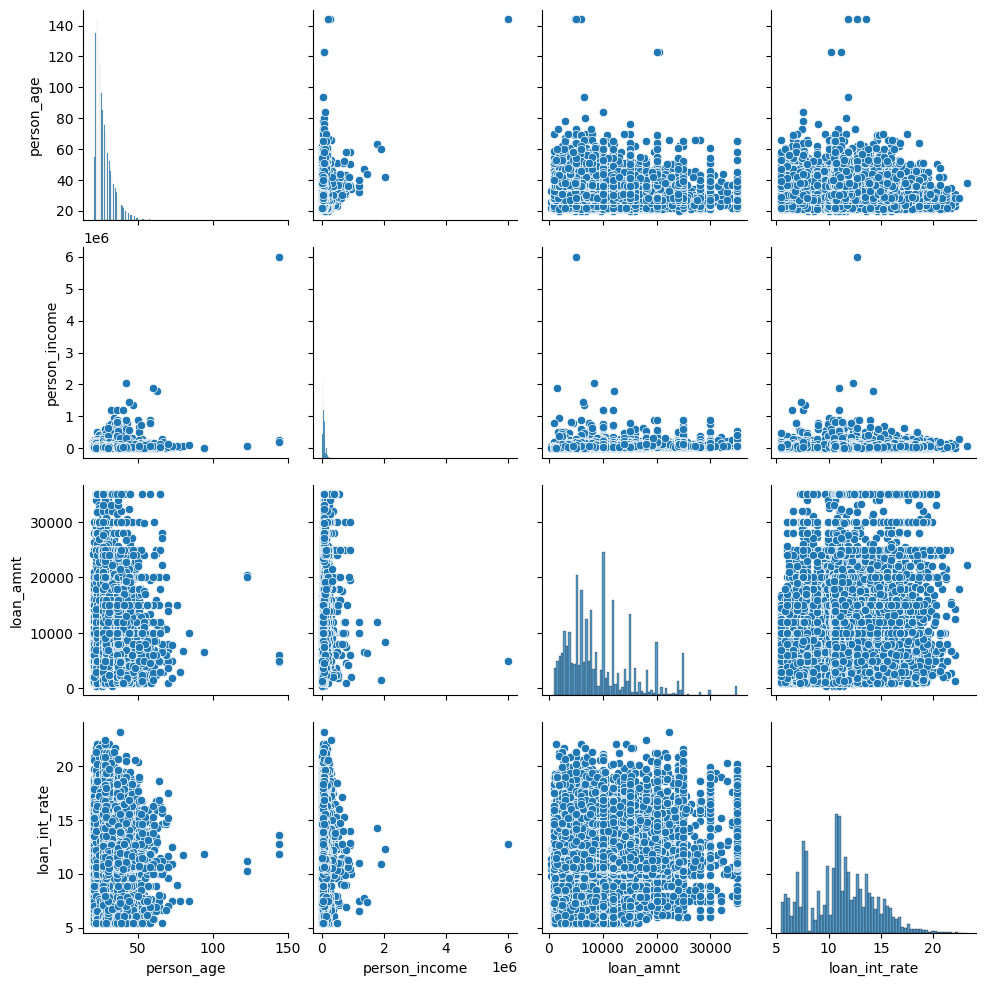

In [ ]:
sns.pairplot(data=df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'debt_to_income_ratio']])
plt.show()


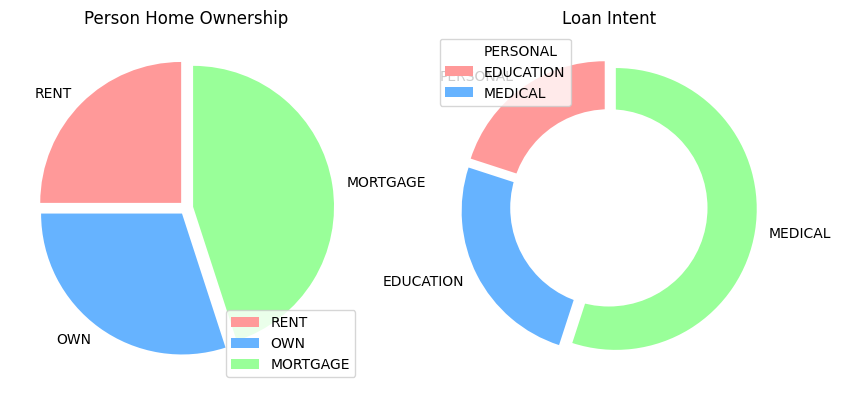

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# create data
labels = ['RENT', 'OWN', 'MORTGAGE']
sizes = [25, 30, 45]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.05,0.05,0.05) # explode 1st, 2nd, and 3rd slice

labels1 = ['PERSONAL', 'EDUCATION', 'MEDICAL']
sizes1 = [20, 25, 55]
colors1 = ['#ff9999','#66b3ff','#99ff99']
explode1 = (0.05,0.05,0.05) # explode 1st, 2nd, and 3rd slice

# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Plot the first donut chart
ax1.pie(sizes, colors = colors, labels = labels, startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax1.set_title("Person Home Ownership")

# Plot the second donut chart
ax2.pie(sizes1, colors = colors1, labels = labels1, startangle=90, pctdistance=0.85, explode = explode1)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax2.set_title("Loan Intent")

# Add legends
ax1.legend(labels, loc="best")
ax2.legend(labels1, loc="best")

plt.show()


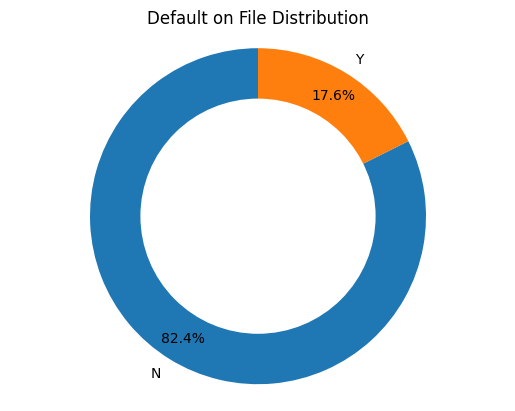

In [ ]:
default_count = df['cb_person_default_on_file'].value_counts()
fig, ax = plt.subplots()
ax.pie(default_count, labels=default_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
plt.title('Default on File Distribution')
plt.show()

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,credit_risk_percent,cb_person_default_on_file,cb_person_cred_hist_length,cluster
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,2
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,2


**Semester Project**


In [17]:
# Model training using regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

# One-hot encode categorical variables
X = pd.get_dummies(data.drop('credit_risk_percent', axis=1))
y = df['credit_risk_percent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE:", mse)
print("R^2:", r2)
# Calculate Mean Absolute Error (MAE)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate Root Mean Squared Error (RMSE)

rmse = sqrt(mse)
print("RMSE:", rmse)



MSE: 2.2552371878306147e-05
R^2: 0.9980005403431631
MAE: 0.00293117528866775
RMSE: 0.004748933762257181


In [20]:
#K-NN regression model
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Define thresholds for binary classification
threshold = 0.5

# Separate the target variable and the predictor variables
X = data.drop(columns=["credit_risk_percent"])
y = data["credit_risk_percent"]

# Convert the target variable to categorical variable
y_cat = pd.cut(y, [-float("inf"), threshold, float("inf")], labels=[0, 1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Train the model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert the predicted values to categorical variable
y_pred_cat = pd.cut(y_pred, [-float("inf"), threshold, float("inf")], labels=[0, 1])

# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, y_pred_cat)
precision = precision_score(y_test, y_pred_cat, average='weighted')
recall = recall_score(y_test, y_pred_cat, average='weighted')
f1 = f1_score(y_test, y_pred_cat, average='weighted')

# Plot the ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.9986189964707688
Precision: 0.9985856724764876
Recall: 0.9986189964707688
F1 Score: 0.9985493183794802
ROC AUC: 0.9866918221622896


In [23]:
#Random Forest algorithm

# importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# selecting features and target variable
X = data.drop(['credit_risk_percent'], axis=1)
y = data['credit_risk_percent']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fitting the model
rf_model.fit(X_train, y_train)

# making predictions on the testing set
y_pred = rf_model.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Random Forest Model")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 score: {r2}")


Random Forest Model
MSE: 1.1620242442841775e-05
MAE: 0.0005062452048492166
R^2 score: 0.9989697666350794


In [ ]:
import pickle

# save the trained model as a pickle file
with open('creditRisk.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# load the trained model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# prompt the user for input
person_age = int(input("Enter person's age: "))
person_income = int(input("Enter person's income: "))
person_emp_length = float(input("Enter person's employment length: "))
loan_amnt = int(input("Enter loan amount: "))
loan_int_rate = float(input("Enter loan interest rate: "))
loan_status = int(input("Enter loan status (1 for approved, 0 for denied): "))
cb_person_cred_hist_length = int(input("Enter person's credit history length: "))
debt_to_income_ratio = float(input("Enter person's debt-to-income ratio: "))
person_home_ownership = input("Enter person's home ownership (RENT, MORTGAGE, OWN, or OTHER): ")
loan_intent = input("Enter loan intent (EDUCATION, PERSONAL, or VENTURE): ")
loan_grade = input("Enter loan grade (A, B, C, D, E, or F): ")

# create a dictionary with the input values
input_data = {
    'person_age': [person_age],
    'person_income': [person_income],
    'person_emp_length': [person_emp_length],
    'loan_amnt': [loan_amnt],
    'loan_int_rate': [loan_int_rate],
    'loan_status': [loan_status],
    'cb_person_cred_hist_length': [cb_person_cred_hist_length],
    'debt_to_income_ratio': [debt_to_income_ratio],
    'person_home_ownership': [person_home_ownership],
    'loan_intent': [loan_intent],
    'loan_grade': [loan_grade]
}

# convert the dictionary to a pandas dataframe
input_df = pd.DataFrame.from_dict(input_data)

# encode the categorical features
input_df = pd.get_dummies(input_df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'])

# add missing columns if necessary
missing_cols = set(X.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0

# reorder columns to match the original dataset
input_df = input_df[X.columns]

# make the prediction
credit_risk_percent = rf_model.predict(input_df)

print(f"Predicted credit risk percent: {credit_risk_percent[0]}")


Flask Integration

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
import pandas as pd
import pickle

# load the trained model from the pickle file
with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

def predict_credit_risk():
    person_age = int(input("Enter person's age: "))
    person_income = int(input("Enter person's income: "))
    person_emp_length = float(input("Enter person's employment length: "))
    loan_amnt = int(input("Enter loan amount: "))
    loan_int_rate = float(input("Enter loan interest rate: "))
    loan_status = int(input("Enter loan status (1 for approved, 0 for denied): "))
    cb_person_cred_hist_length = int(input("Enter person's credit history length: "))
    debt_to_income_ratio = float(input("Enter person's debt-to-income ratio: "))
    person_home_ownership = input("Enter person's home ownership (RENT, MORTGAGE, OWN, or OTHER): ")
    loan_intent = input("Enter loan intent (EDUCATION, PERSONAL, or VENTURE): ")
    loan_grade = input("Enter loan grade (A, B, C, D, E, or F): ")

    input_data = {
        'person_age': [person_age],
        'person_income': [person_income],
        'person_emp_length': [person_emp_length],
        'loan_amnt': [loan_amnt],
        'loan_int_rate': [loan_int_rate],
        'loan_status': [loan_status],
        'cb_person_cred_hist_length': [cb_person_cred_hist_length],
        'debt_to_income_ratio': [debt_to_income_ratio],
        'person_home_ownership': [person_home_ownership],
        'loan_intent': [loan_intent],
        'loan_grade': [loan_grade]
    }

    input_df = pd.DataFrame.from_dict(input_data)

    input_df = pd.get_dummies(input_df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'])

    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0

    input_df = input_df[X.columns]

    credit_risk_percent = rf_model.predict(input_df)

    return credit_risk_percent[0]


In [ ]:
predict_credit_risk()

Enter person's age: 30
Enter person's income: 23000
Enter person's employment length: 20
Enter loan amount: 1000
Enter loan interest rate: 1
Enter loan status (1 for approved, 0 for denied): 1
Enter person's credit history length: 10
Enter person's debt-to-income ratio: 2
Enter person's home ownership (RENT, MORTGAGE, OWN, or OTHER): OWN
Enter loan intent (EDUCATION, PERSONAL, or VENTURE): EDUCATION
Enter loan grade (A, B, C, D, E, or F): A


0.7913999999999999

In [ ]:
from flask import Flask, jsonify, request
import pandas as pd
import pickle


# load the trained model from the pickle file
with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

app = Flask(__name__)


@app.route('/hello', methods=['GET'])
def hello():
    return jsonify({"message": "Hello, World!"})

@app.route('/predict_credit_risk', methods=['POST'])
def predict_credit_risk():
    # get input data from request
    data = request.json

    # convert data to input dataframe
    input_data = {
        'person_age': [data['person_age']],
        'person_income': [data['person_income']],
        'person_emp_length': [data['person_emp_length']],
        'loan_amnt': [data['loan_amnt']],
        'loan_int_rate': [data['loan_int_rate']],
        'loan_status': [data['loan_status']],
        'cb_person_cred_hist_length': [data['cb_person_cred_hist_length']],
        'debt_to_income_ratio': [data['debt_to_income_ratio']],
        'person_home_ownership': [data['person_home_ownership']],
        'loan_intent': [data['loan_intent']],
        'loan_grade': [data['loan_grade']]
    }
    input_df = pd.DataFrame.from_dict(input_data)
    input_df = pd.get_dummies(
        input_df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'])
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    input_df = input_df[X.columns]

    # predict credit risk
    credit_risk_percent = rf_model.predict(input_df)

    # return result as json
    result = {'credit_risk_percent': credit_risk_percent[0]}
    return jsonify(result)


if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
X.to_csv('X2.csv', index=False)